#### Practice 3: YOLOv3

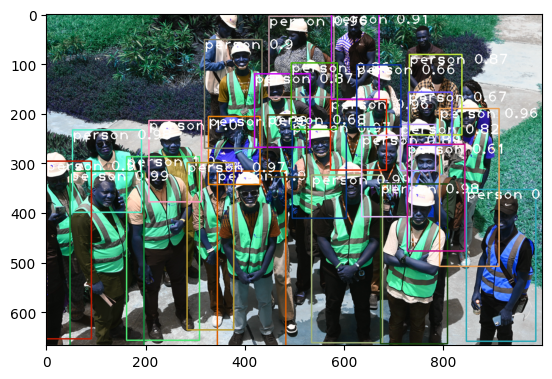

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load YOLO
net =  cv2.dnn.readNet('cfg/yolov3.weights', 'cfg/yolov3.cfg')
classes = []
with open('cfg/coco.names', 'r') as f:
    classes = f.read().splitlines()

# Load input image
image = cv2.imread('img/lake.jpg')
height, width, _ = image.shape

# Preprocess input image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Forward pass through the network
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Forward pass through network
output_layers_names = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers_names)

# Process detection results
boxes = []
confidences = []
class_ids = []


for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-max suppression to remove redundant overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Draw bounding boxes and labels
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[i]
    cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)
    cv2.putText(image, label + " " + confidence, (x, y + 20), font, 2, (255, 255, 255), 2)


# Display the output image
# cv2.imshow("Image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image)
plt.show()
